In [1]:
import pandas as pd

In [2]:
allYears = pd.read_csv('../dataProduced/ClinVarTwoLabelsSample.csv.gz', sep = '\t', compression = 'zip') 


/data/gpfs-1/scratch/users/nazaretl_c/tmp/ipykernel_2184425/797805296.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  allYears = pd.read_csv('../dataProduced/ClinVarTwoLabelsSample.csv.gz', sep = '\t', compression = 'zip')


In [8]:
(allYears['LabelOld']!=allYears['LabelNew']).sum()#/
len(allYears)

2120423

In [4]:
allYears['LabelOld'].value_counts()

LabelOld
VUS            1109270
Benign          806334
Pathogenic      200010
Conflicting       4809
Name: count, dtype: int64

In [58]:
(138462-103213 )#/2017210


35249

In [12]:
conf = allYears[((allYears['LabelOld']=='Conflicting')|(allYears['LabelNew']=='Conflicting'))]
rest = allYears[~((allYears['LabelOld']=='Conflicting')|(allYears['LabelNew']=='Conflicting'))]

conf.shape

(103213, 105)

In [13]:
rest.shape

(2017210, 105)

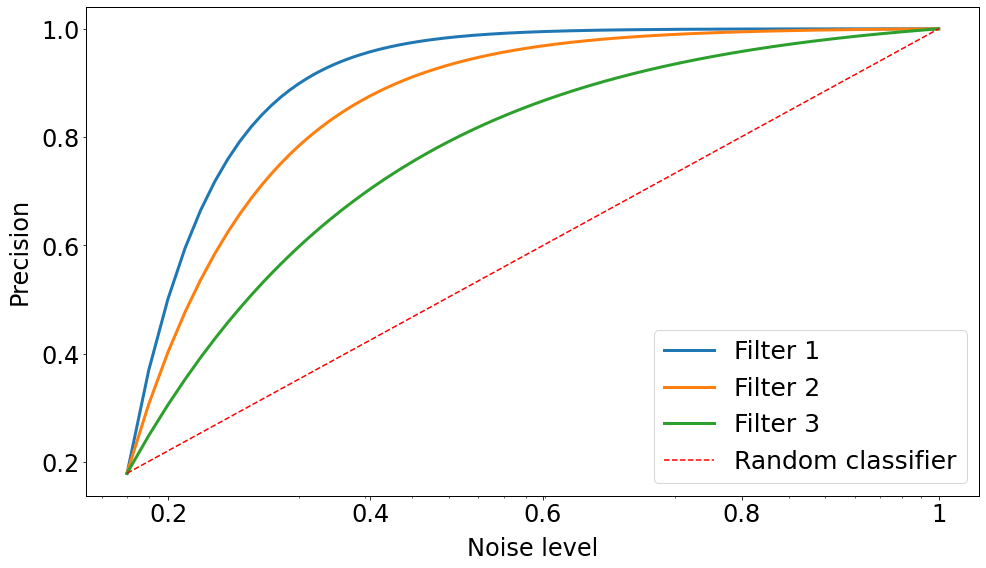

In [51]:
import matplotlib
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


def pl1(xData,yData,name):
    import numpy, scipy, matplotlib
    import matplotlib.pyplot as plt
    from scipy.optimize import curve_fit




    def func(x, a, b, offset): # polytrope equation from zunzun.com
        return  a / numpy.power(x, b) + offset


    # these are the same as the scipy defaults
    initialParameters = numpy.array([1.0, 1.0, 1.0])

    # curve fit the test data
    fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)

    modelPredictions = func(xData, *fittedParameters) 

    absError = modelPredictions - yData
    xModel = numpy.linspace(min(xData), max(xData), 1000)
    yModel = func(xModel, *fittedParameters)
    plt.plot(xModel/xModel.max(),yModel/yModel.max(),label=name,linewidth = 3)

    return xModel/xModel.max(),yModel/yModel.max()
   



s = 3
fig, ax = plt.subplots(figsize=(16,9))  
    




xData = np.array([7e-09, 9e-09, 1e-08, 2e-8, 1e-6])
yData = np.array([600.0, 900.0, 2500.0, 2500.0, 3100.0])
pl1(xData,yData,'Filter 1')

xData = np.array([7e-09, 9e-09, 1e-08, 2e-8, 1e-6])
yData = np.array([450.0, 800.0, 2200.0, 2000.0, 3100.0])
pl1(xData,yData,'Filter 2')

xData = np.array([7e-09, 9e-09, 1e-08, 2e-8, 1e-6])
yData = np.array([700.0, 900.0, 900.0, 2000.0, 3100.0])
a,b = pl1(xData,yData,'Filter 3')




ax.tick_params(axis='both' , labelsize=8*s)

ax.set_ylabel('Precision', fontsize = 8*s,labelpad=10)
ax.set_xlabel('Noise level',fontsize = 8*s,labelpad=10)


#ax.plot([0,0],[1,1],color = 'red', linestyle='dashed',label='Random classifier')

ax.plot([a.min(),a.max()],[b.min(),b.max()],color = 'red', linestyle='dashed',label='Random classifier')
#ax.plot(a.min(),1,'ob', linewidth=10, markersize=18,marker='*',color = 'black',label='Perfect classifier')

plt.xscale('log')

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.legend(fontsize = 8*s,prop={'size': 25})
start, end = ax.get_xlim()
#ax.xaxis.set_ticks([0.01,0.03,0.1,0.3,1])
plt.xticks([0.009,0.031,0.089,0.3,a.max()],[0.2,0.4,0.6,0.8,1])
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
    
x = 0.03
y = 0.88
# 0.053, 0.62
#ax.annotate(
#   '', xy=(x, y
#          ), xycoords='data',
#   xytext=(x+0.16, y-0.66), textcoords='data',
#   arrowprops={'arrowstyle': '<->'})
plt.savefig('../figuresNew/PON.svg', transparent=True,bbox_inches = 'tight')
plt.show()

In [57]:
import numpy as np
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5, 6, 7,9,10])
y = np.array([0, 30, 38,40,45,46, 48,49, 50 ])

x = np.array([1,5,10])
y = np.array([0, 30, 50 ])


X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.make_interp_spline() Class")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

ValueError: The number of derivatives at boundaries does not match: expected 1, got 0+0

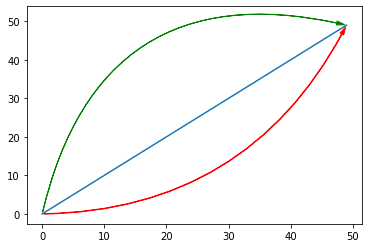

In [46]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
plt.close()
fig, ax = plt.subplots()
x = np.arange(50)
y = np.arange(50)
ax.plot(x, y)

a_red = patches.FancyArrowPatch((x[0], y[0]), (x[-1], y[-1]), connectionstyle="arc3,rad=0.3", 
                                arrowstyle="Simple, tail_width=0.5, head_width=4, head_length=8", color='r')
a_gre = patches.FancyArrowPatch((x[0], y[0]), (x[-1], y[-1]), connectionstyle="arc3,rad=-0.5", 
                                arrowstyle="Simple, tail_width=0.2, head_width=4, head_length=8", color='g')
plt.gca().add_patch(a_red)
plt.gca().add_patch(a_gre)

angle: 121.34521414171566


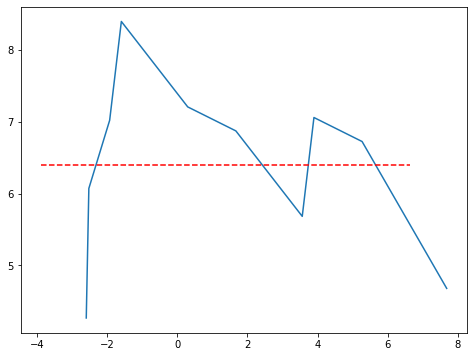

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import transforms

x = [5, 6.5, 7, 8, 6, 5, 3, 4, 3, 0]
y = range(len(x))
best_fit_line = np.poly1d(np.polyfit(y, x, 1))(y)

angle = np.rad2deg(np.arctan2(y[-1] - y[0], best_fit_line[-1] - best_fit_line[0]))
print("angle: " + str(angle))

plt.figure(figsize=(8, 6))

base = plt.gca().transData
rotation = transforms.Affine2D().rotate_deg(angle - 90)

plt.plot(x, transform = rotation + base)
plt.plot(best_fit_line, "--", color="r", transform = rotation + base)